# ResNet50 on Mnist data

It's just for practice.

In [ ]:
import tensorflow as tf
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

3


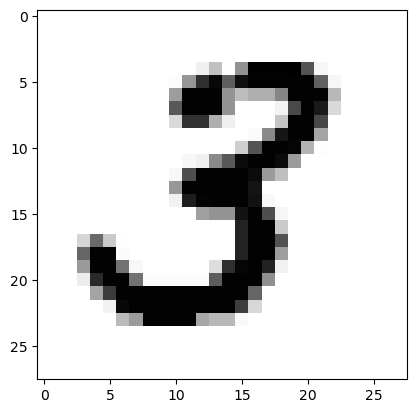

In [3]:
import matplotlib.pyplot as plt
image_index = 255 
print(y_train[image_index]) 
plt.imshow(x_train[image_index], cmap='Greys') 

In [4]:
x_train.shape
x_train = x_train.reshape(x_train.shape[0], 28, 28, 1)
x_test = x_test.reshape(x_test.shape[0], 28, 28, 1)
input_shape = (28, 28, 1)

In [5]:
x_train = x_train.astype('float32')
x_test = x_test.astype('float32')
x_train /= 255
x_test /= 255
print('x_train shape:', x_train.shape)
print('Number of images in x_train', x_train.shape[0])
print('Number of images in x_test', x_test.shape[0])

x_train shape: (60000, 28, 28, 1)
Number of images in x_train 60000
Number of images in x_test 10000


In [6]:
from tensorflow.keras.applications.resnet50 import ResNet50, preprocess_input
from keras.preprocessing import image

In [7]:
IMG_HEIGHT = 32
IMG_WIDTH = 32
DEPTH = 3

In [8]:
model=ResNet50(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(IMG_HEIGHT,IMG_WIDTH,DEPTH)
)

In [9]:
model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

In [10]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model = Sequential() 
model.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Flatten()) 
model.add(Dense(128, activation=tf.nn.relu))
model.add(Dropout(0.5))
model.add(Dense(10,activation=tf.nn.softmax))

In [11]:
from tensorflow.keras.optimizers import SGD

# Model with 0.01 and SGD

In [12]:
learning_rate = 0.01 
sgd_optimizer = SGD(learning_rate=learning_rate)
model.compile(optimizer=sgd_optimizer,
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [13]:
history = model.fit(x=x_train,y=y_train, validation_data=(x_test, y_test), epochs=10,validation_split=0.2,batch_size=32)

Epoch 1/10
1500/1500 [==============================] - 7s 3ms/step - loss: 0.6439 - accuracy: 0.8094 - val_loss: 0.2526 - val_accuracy: 0.9283
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.3289 - accuracy: 0.9031 - val_loss: 0.1941 - val_accuracy: 0.9450
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2714 - accuracy: 0.9196 - val_loss: 0.1662 - val_accuracy: 0.9537
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2424 - accuracy: 0.9287 - val_loss: 0.1518 - val_accuracy: 0.9554
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.2233 - accuracy: 0.9332 - val_loss: 0.1370 - val_accuracy: 0.9603
Epoch 6/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.2034 - accuracy: 0.9395 - val_loss: 0.1283 - val_accuracy: 0.9613
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.1918 - accuracy: 0.9431 - val_loss: 0.1163 - val_accuracy:

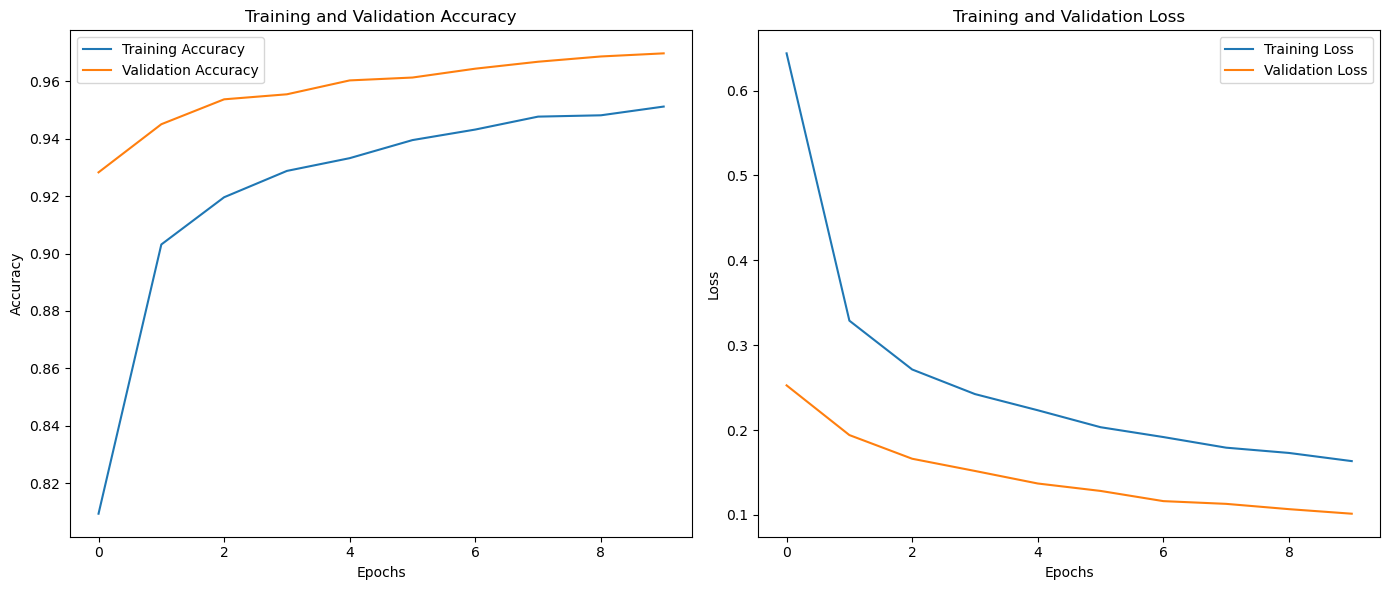

In [14]:
plt.figure(figsize=(14, 6))

# Plotting Accuracy
plt.subplot(1, 2, 1)  # 1 row, 2 columns, this is the first subplot
plt.plot(history.history['accuracy'], label='Training Accuracy')
plt.plot(history.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, this is the second subplot
plt.plot(history.history['loss'], label='Training Loss')
plt.plot(history.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

# Model with 0.01 and Adam

In [15]:
model2=ResNet50(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(IMG_HEIGHT,IMG_WIDTH,DEPTH)
)

In [16]:
model2.summary()

Model: "resnet50"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_2 (InputLayer)           [(None, 32, 32, 3)]  0           []                               
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 38, 38, 3)    0           ['input_2[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 16, 16, 64)   9472        ['conv1_pad[0][0]']              
                                                                                                  
 conv1_bn (BatchNormalization)  (None, 16, 16, 64)   256         ['conv1_conv[0][0]']             
                                                                                           

In [17]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model2 = Sequential() 
model2.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model2.add(MaxPooling2D(pool_size=(2, 2)))
model2.add(Flatten()) 
model2.add(Dense(128, activation=tf.nn.relu))
model2.add(Dropout(0.5))
model2.add(Dense(10,activation=tf.nn.softmax))

In [18]:
from tensorflow.keras.optimizers import Adam

In [19]:
# Define your learning rate
learning_rate = 0.01 
adam_optimizer = Adam(learning_rate=learning_rate)
model2.compile(optimizer=adam_optimizer,
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [20]:
history2 = model2.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5711 - accuracy: 0.8451 - val_loss: 0.3570 - val_accuracy: 0.8997
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5434 - accuracy: 0.8680 - val_loss: 0.2809 - val_accuracy: 0.9419
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5678 - accuracy: 0.8728 - val_loss: 0.2950 - val_accuracy: 0.9358
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5896 - accuracy: 0.8672 - val_loss: 0.3571 - val_accuracy: 0.9243
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.5837 - accuracy: 0.8687 - val_loss: 0.3034 - val_accuracy: 0.9445
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6092 - accuracy: 0.8657 - val_loss: 0.3618 - val_accuracy: 0.9487
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.6253 - accuracy: 0.8655 - val_loss: 0.3606 - val_accuracy:

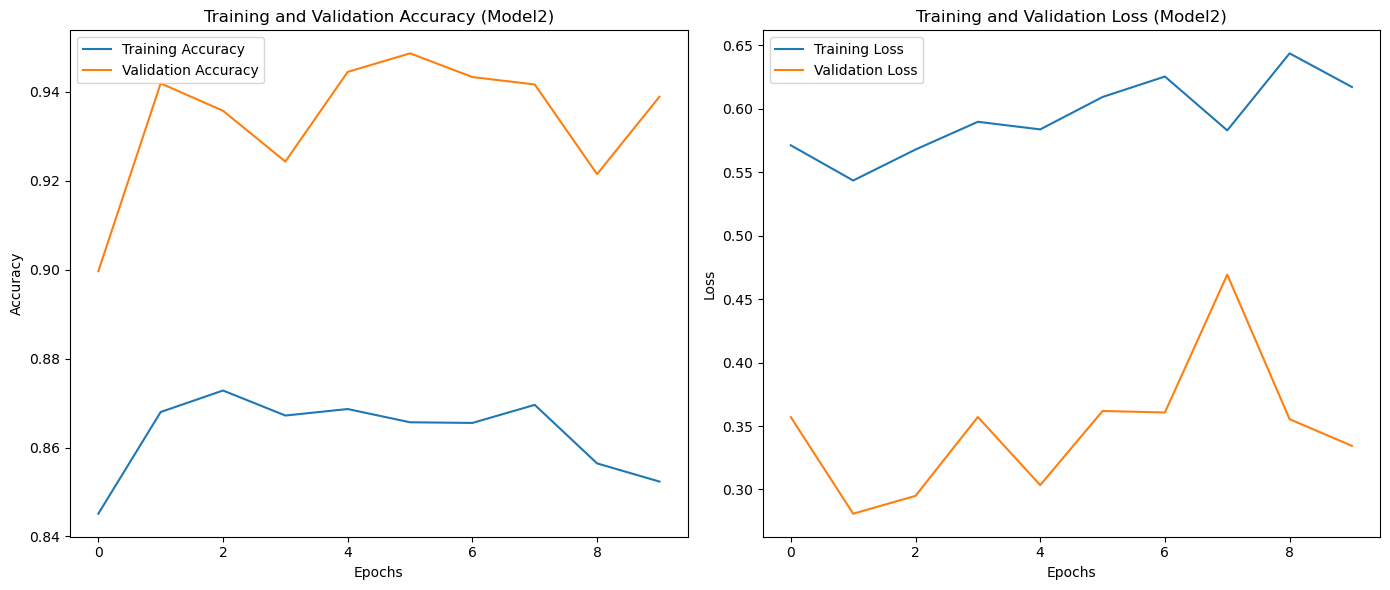

In [21]:


# Set the figure size
plt.figure(figsize=(14, 6))

# Plotting Accuracy
plt.subplot(1, 2, 1)  # 1 row, 2 columns, this is the first subplot
plt.plot(history2.history['accuracy'], label='Training Accuracy')
plt.plot(history2.history['val_accuracy'], label='Validation Accuracy')
plt.title('Training and Validation Accuracy (Model2)')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Plotting Loss
plt.subplot(1, 2, 2)  # 1 row, 2 columns, this is the second subplot
plt.plot(history2.history['loss'], label='Training Loss')
plt.plot(history2.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss (Model2)')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

# Model with 0.01 and RMSprop

In [28]:
model3=ResNet50(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(IMG_HEIGHT,IMG_WIDTH,DEPTH)
)

In [29]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model3 = Sequential() 
model3.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model3.add(MaxPooling2D(pool_size=(2, 2)))
model3.add(Flatten()) 
model3.add(Dense(128, activation=tf.nn.relu))
model3.add(Dropout(0.5))
model3.add(Dense(10,activation=tf.nn.softmax))

In [30]:
from tensorflow.keras.optimizers import RMSprop

In [31]:
learning_rate = 0.01 
rms_prop = RMSprop(learning_rate=learning_rate)
model3.compile(optimizer=rms_prop,
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [32]:
history3 = model3.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.6364 - accuracy: 0.8582 - val_loss: 0.2757 - val_accuracy: 0.9487
Epoch 2/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.7107 - accuracy: 0.8864 - val_loss: 0.2579 - val_accuracy: 0.9591
Epoch 3/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.7994 - accuracy: 0.8850 - val_loss: 0.4179 - val_accuracy: 0.9463
Epoch 4/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.9610 - accuracy: 0.8806 - val_loss: 0.4979 - val_accuracy: 0.9384
Epoch 5/10
1500/1500 [==============================] - 5s 4ms/step - loss: 1.0140 - accuracy: 0.8702 - val_loss: 0.3918 - val_accuracy: 0.9368
Epoch 6/10
1500/1500 [==============================] - 5s 4ms/step - loss: 1.1361 - accuracy: 0.8560 - val_loss: 0.9045 - val_accuracy: 0.9062
Epoch 7/10
1500/1500 [==============================] - 5s 4ms/step - loss: 1.2061 - accuracy: 0.8375 - val_loss: 0.5075 - val_accuracy:

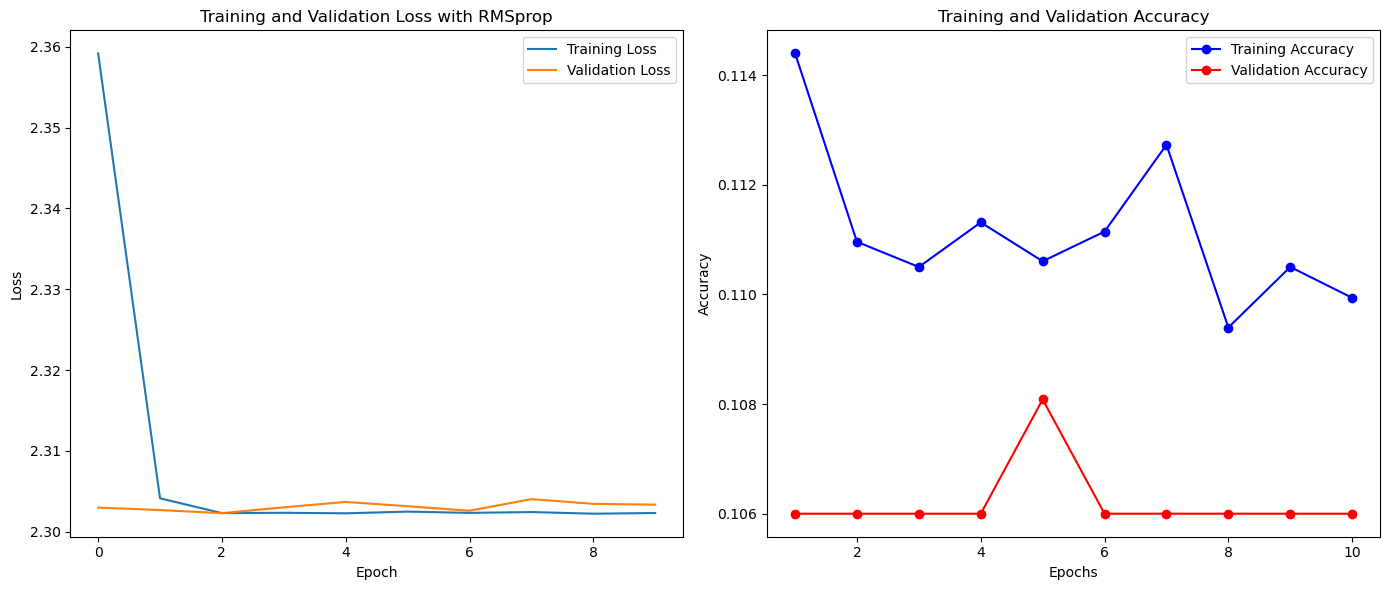

In [27]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, this is the first subplot
plt.plot(history3.history['loss'], label='Training Loss')
plt.plot(history3.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss with RMSprop')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting Accuracy
plt.subplot(1, 2, 2)  # 1 row, 2 columns, this is the second subplot
training_accuracy = history3.history['accuracy']
validation_accuracy = history3.history['val_accuracy']
epochs = range(1, len(training_accuracy) + 1)

plt.plot(epochs, training_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

# Model with 0.001 and RMSprop

In [33]:
model4=ResNet50(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(IMG_HEIGHT,IMG_WIDTH,DEPTH)
)

In [34]:
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
model4 = Sequential() 
model4.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model4.add(MaxPooling2D(pool_size=(2, 2)))
model4.add(Flatten()) 
model4.add(Dense(128, activation=tf.nn.relu))
model4.add(Dropout(0.5))
model4.add(Dense(10,activation=tf.nn.softmax))

In [36]:
learning_rate = 0.001 
rms_prop1 = RMSprop(learning_rate=learning_rate)
model4.compile(optimizer=rms_prop1,
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [37]:
history4 = model4.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.3082 - accuracy: 0.9066 - val_loss: 0.1036 - val_accuracy: 0.9707
Epoch 2/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1483 - accuracy: 0.9565 - val_loss: 0.0856 - val_accuracy: 0.9755
Epoch 3/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1193 - accuracy: 0.9651 - val_loss: 0.0752 - val_accuracy: 0.9786
Epoch 4/10
1500/1500 [==============================] - 5s 4ms/step - loss: 0.1067 - accuracy: 0.9695 - val_loss: 0.0865 - val_accuracy: 0.9749
Epoch 5/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.1029 - accuracy: 0.9703 - val_loss: 0.0795 - val_accuracy: 0.9805
Epoch 6/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0940 - accuracy: 0.9729 - val_loss: 0.0812 - val_accuracy: 0.9805
Epoch 7/10
1500/1500 [==============================] - 6s 4ms/step - loss: 0.0873 - accuracy: 0.9747 - val_loss: 0.0652 - val_accuracy:

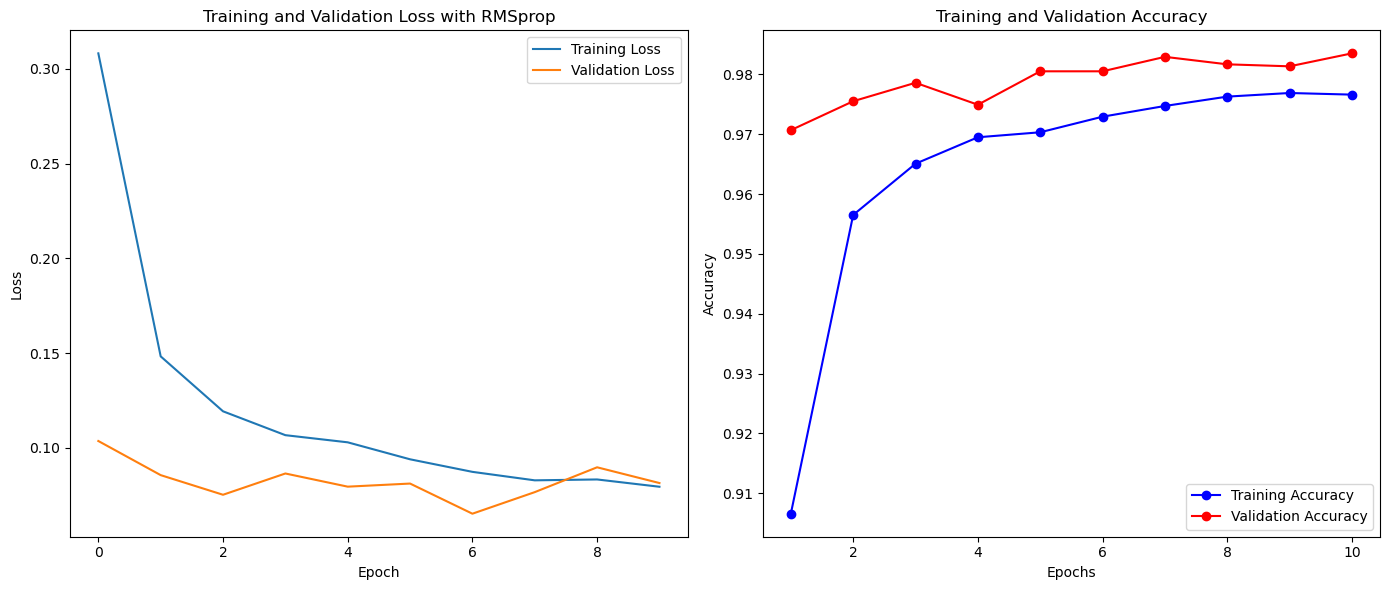

In [38]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, this is the first subplot
plt.plot(history4.history['loss'], label='Training Loss')
plt.plot(history4.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss with RMSprop')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting Accuracy
plt.subplot(1, 2, 2)  # 1 row, 2 columns, this is the second subplot
training_accuracy = history4.history['accuracy']
validation_accuracy = history4.history['val_accuracy']
epochs = range(1, len(training_accuracy) + 1)

plt.plot(epochs, training_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

# Model with 0.001 and Adam

In [39]:
model5=ResNet50(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(IMG_HEIGHT,IMG_WIDTH,DEPTH)
)

In [40]:
model5 = Sequential() 
model5.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model5.add(MaxPooling2D(pool_size=(2, 2)))
model5.add(Flatten()) 
model5.add(Dense(128, activation=tf.nn.relu))
model5.add(Dropout(0.5))
model5.add(Dense(10,activation=tf.nn.softmax))

In [42]:
learning_rate = 0.001 
adam1 = Adam(learning_rate=learning_rate)
model5.compile(optimizer=adam1,
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [43]:
history5 = model5.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.3229 - accuracy: 0.9024 - val_loss: 0.1045 - val_accuracy: 0.9700
Epoch 2/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1527 - accuracy: 0.9536 - val_loss: 0.0775 - val_accuracy: 0.9769
Epoch 3/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.1177 - accuracy: 0.9640 - val_loss: 0.0679 - val_accuracy: 0.9794
Epoch 4/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0986 - accuracy: 0.9694 - val_loss: 0.0632 - val_accuracy: 0.9809
Epoch 5/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0838 - accuracy: 0.9736 - val_loss: 0.0658 - val_accuracy: 0.9832
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0721 - accuracy: 0.9774 - val_loss: 0.0633 - val_accuracy: 0.9821
Epoch 7/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.0658 - accuracy: 0.9789 - val_loss: 0.0579 - val_accuracy:

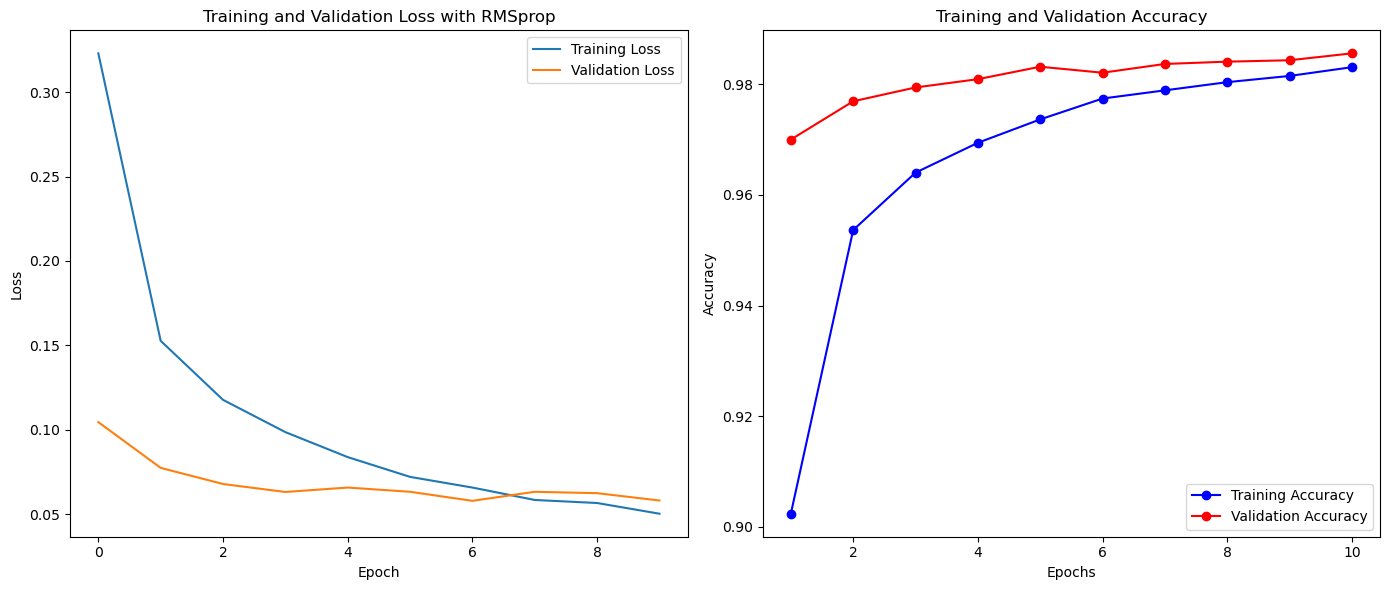

In [44]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, this is the first subplot
plt.plot(history5.history['loss'], label='Training Loss')
plt.plot(history5.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss with RMSprop')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting Accuracy
plt.subplot(1, 2, 2)  # 1 row, 2 columns, this is the second subplot
training_accuracy = history5.history['accuracy']
validation_accuracy = history5.history['val_accuracy']
epochs = range(1, len(training_accuracy) + 1)

plt.plot(epochs, training_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()

# Model with 0.001 and SGD

In [45]:
model6=ResNet50(
    include_top=False,
    weights="imagenet",
    input_tensor=None,
    input_shape=(IMG_HEIGHT,IMG_WIDTH,DEPTH)
)

In [46]:
model6 = Sequential() 
model6.add(Conv2D(28, kernel_size=(3,3), input_shape=input_shape))
model6.add(MaxPooling2D(pool_size=(2, 2)))
model6.add(Flatten()) 
model6.add(Dense(128, activation=tf.nn.relu))
model6.add(Dropout(0.5))
model6.add(Dense(10,activation=tf.nn.softmax))

In [47]:
learning_rate = 0.001 
sgd1 = SGD(learning_rate=learning_rate)
model6.compile(optimizer=sgd1,
              loss='sparse_categorical_crossentropy', 
              metrics=['accuracy'])

In [48]:
history6 = model6.fit(x=x_train, y=y_train, validation_data=(x_test, y_test), epochs=10, validation_split=0.2, batch_size=32)

Epoch 1/10
1500/1500 [==============================] - 5s 3ms/step - loss: 1.9068 - accuracy: 0.4361 - val_loss: 1.2126 - val_accuracy: 0.7943
Epoch 2/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.9705 - accuracy: 0.7284 - val_loss: 0.5593 - val_accuracy: 0.8737
Epoch 3/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.6653 - accuracy: 0.8041 - val_loss: 0.4184 - val_accuracy: 0.8944
Epoch 4/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.5522 - accuracy: 0.8355 - val_loss: 0.3597 - val_accuracy: 0.9040
Epoch 5/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4937 - accuracy: 0.8532 - val_loss: 0.3266 - val_accuracy: 0.9107
Epoch 6/10
1500/1500 [==============================] - 5s 3ms/step - loss: 0.4529 - accuracy: 0.8674 - val_loss: 0.3012 - val_accuracy: 0.9171
Epoch 7/10
1500/1500 [==============================] - 4s 3ms/step - loss: 0.4232 - accuracy: 0.8756 - val_loss: 0.2845 - val_accuracy:

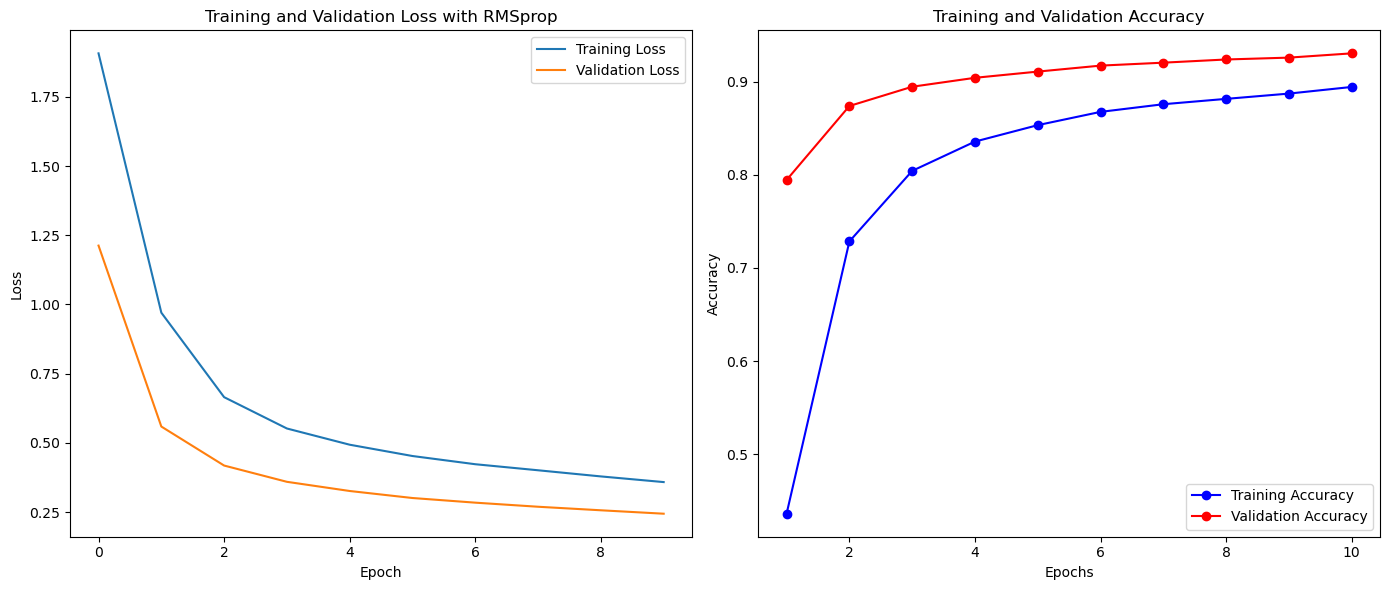

In [49]:
plt.figure(figsize=(14, 6))
plt.subplot(1, 2, 1)  # 1 row, 2 columns, this is the first subplot
plt.plot(history6.history['loss'], label='Training Loss')
plt.plot(history6.history['val_loss'], label='Validation Loss')
plt.title('Training and Validation Loss with RMSprop')
plt.xlabel('Epoch')
plt.ylabel('Loss')
plt.legend()

# Plotting Accuracy
plt.subplot(1, 2, 2)  # 1 row, 2 columns, this is the second subplot
training_accuracy = history6.history['accuracy']
validation_accuracy = history6.history['val_accuracy']
epochs = range(1, len(training_accuracy) + 1)

plt.plot(epochs, training_accuracy, 'bo-', label='Training Accuracy')
plt.plot(epochs, validation_accuracy, 'ro-', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

# Adjust layout for better visualization
plt.tight_layout()

# Show the plot
plt.show()